In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
nx,ny = 1,1 # board size
res = 64

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
f = 1
orientation_offset = 0
center = np.zeros(2)

squaregridmodule = SquareGridModule(center,orientation_offset,f,non_negative=False,add=True)

In [4]:
#phases = center[None]
#phases = squaregridmodule.inner_square.sample(3)
#phases = np.stack([center] + [np.array([2*0.5/f, 0])] + [np.array([0, 2*0.5/f])],axis=0)
#phases = np.stack([center] + [np.array([0.5/f, 0])] + [np.array([0, 0.5/f])],axis=0)
#phases = np.stack([center] + [center] + [np.array([0.5/f, 0.5/f])],axis=0)
#phases = np.stack([center] + [np.array([0.25/f, 0.25/f])] + [center],axis=0)
#phases = np.stack([center] + [np.array([0.25/f, 0.25/f])] + [np.array([-0.25/f, 0.25/f])],axis=0)
phases = np.stack([np.array([0,-0.25/(f*np.sqrt(2))])] + [np.array([0.25/f, 0.25/f])] + [np.array([-0.25/f, 0.25/f])],axis=0)
#phases = np.stack([center] + [np.array([0.2/f, 0])] + [np.array([0.4/f, 0])],axis=0)

# check periodicity (see ratemaps below) of the inner square. x=0.5=1.5 for f=1
#phases = np.stack([center] + [np.array([-0.25/f, 0])] + [np.array([0.75/f, 0])],axis=0)

squaregridmodule.init_module(phases)
ratemaps = squaregridmodule(board)
ratemaps.shape

(3, 64, 64)

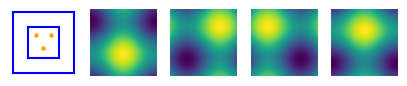

In [5]:
fig, axs = plot_samples_and_tiling(squaregridmodule, ratemaps, 3, figsize=(5,5))
fig.savefig("results/three-square-patterns.pdf")

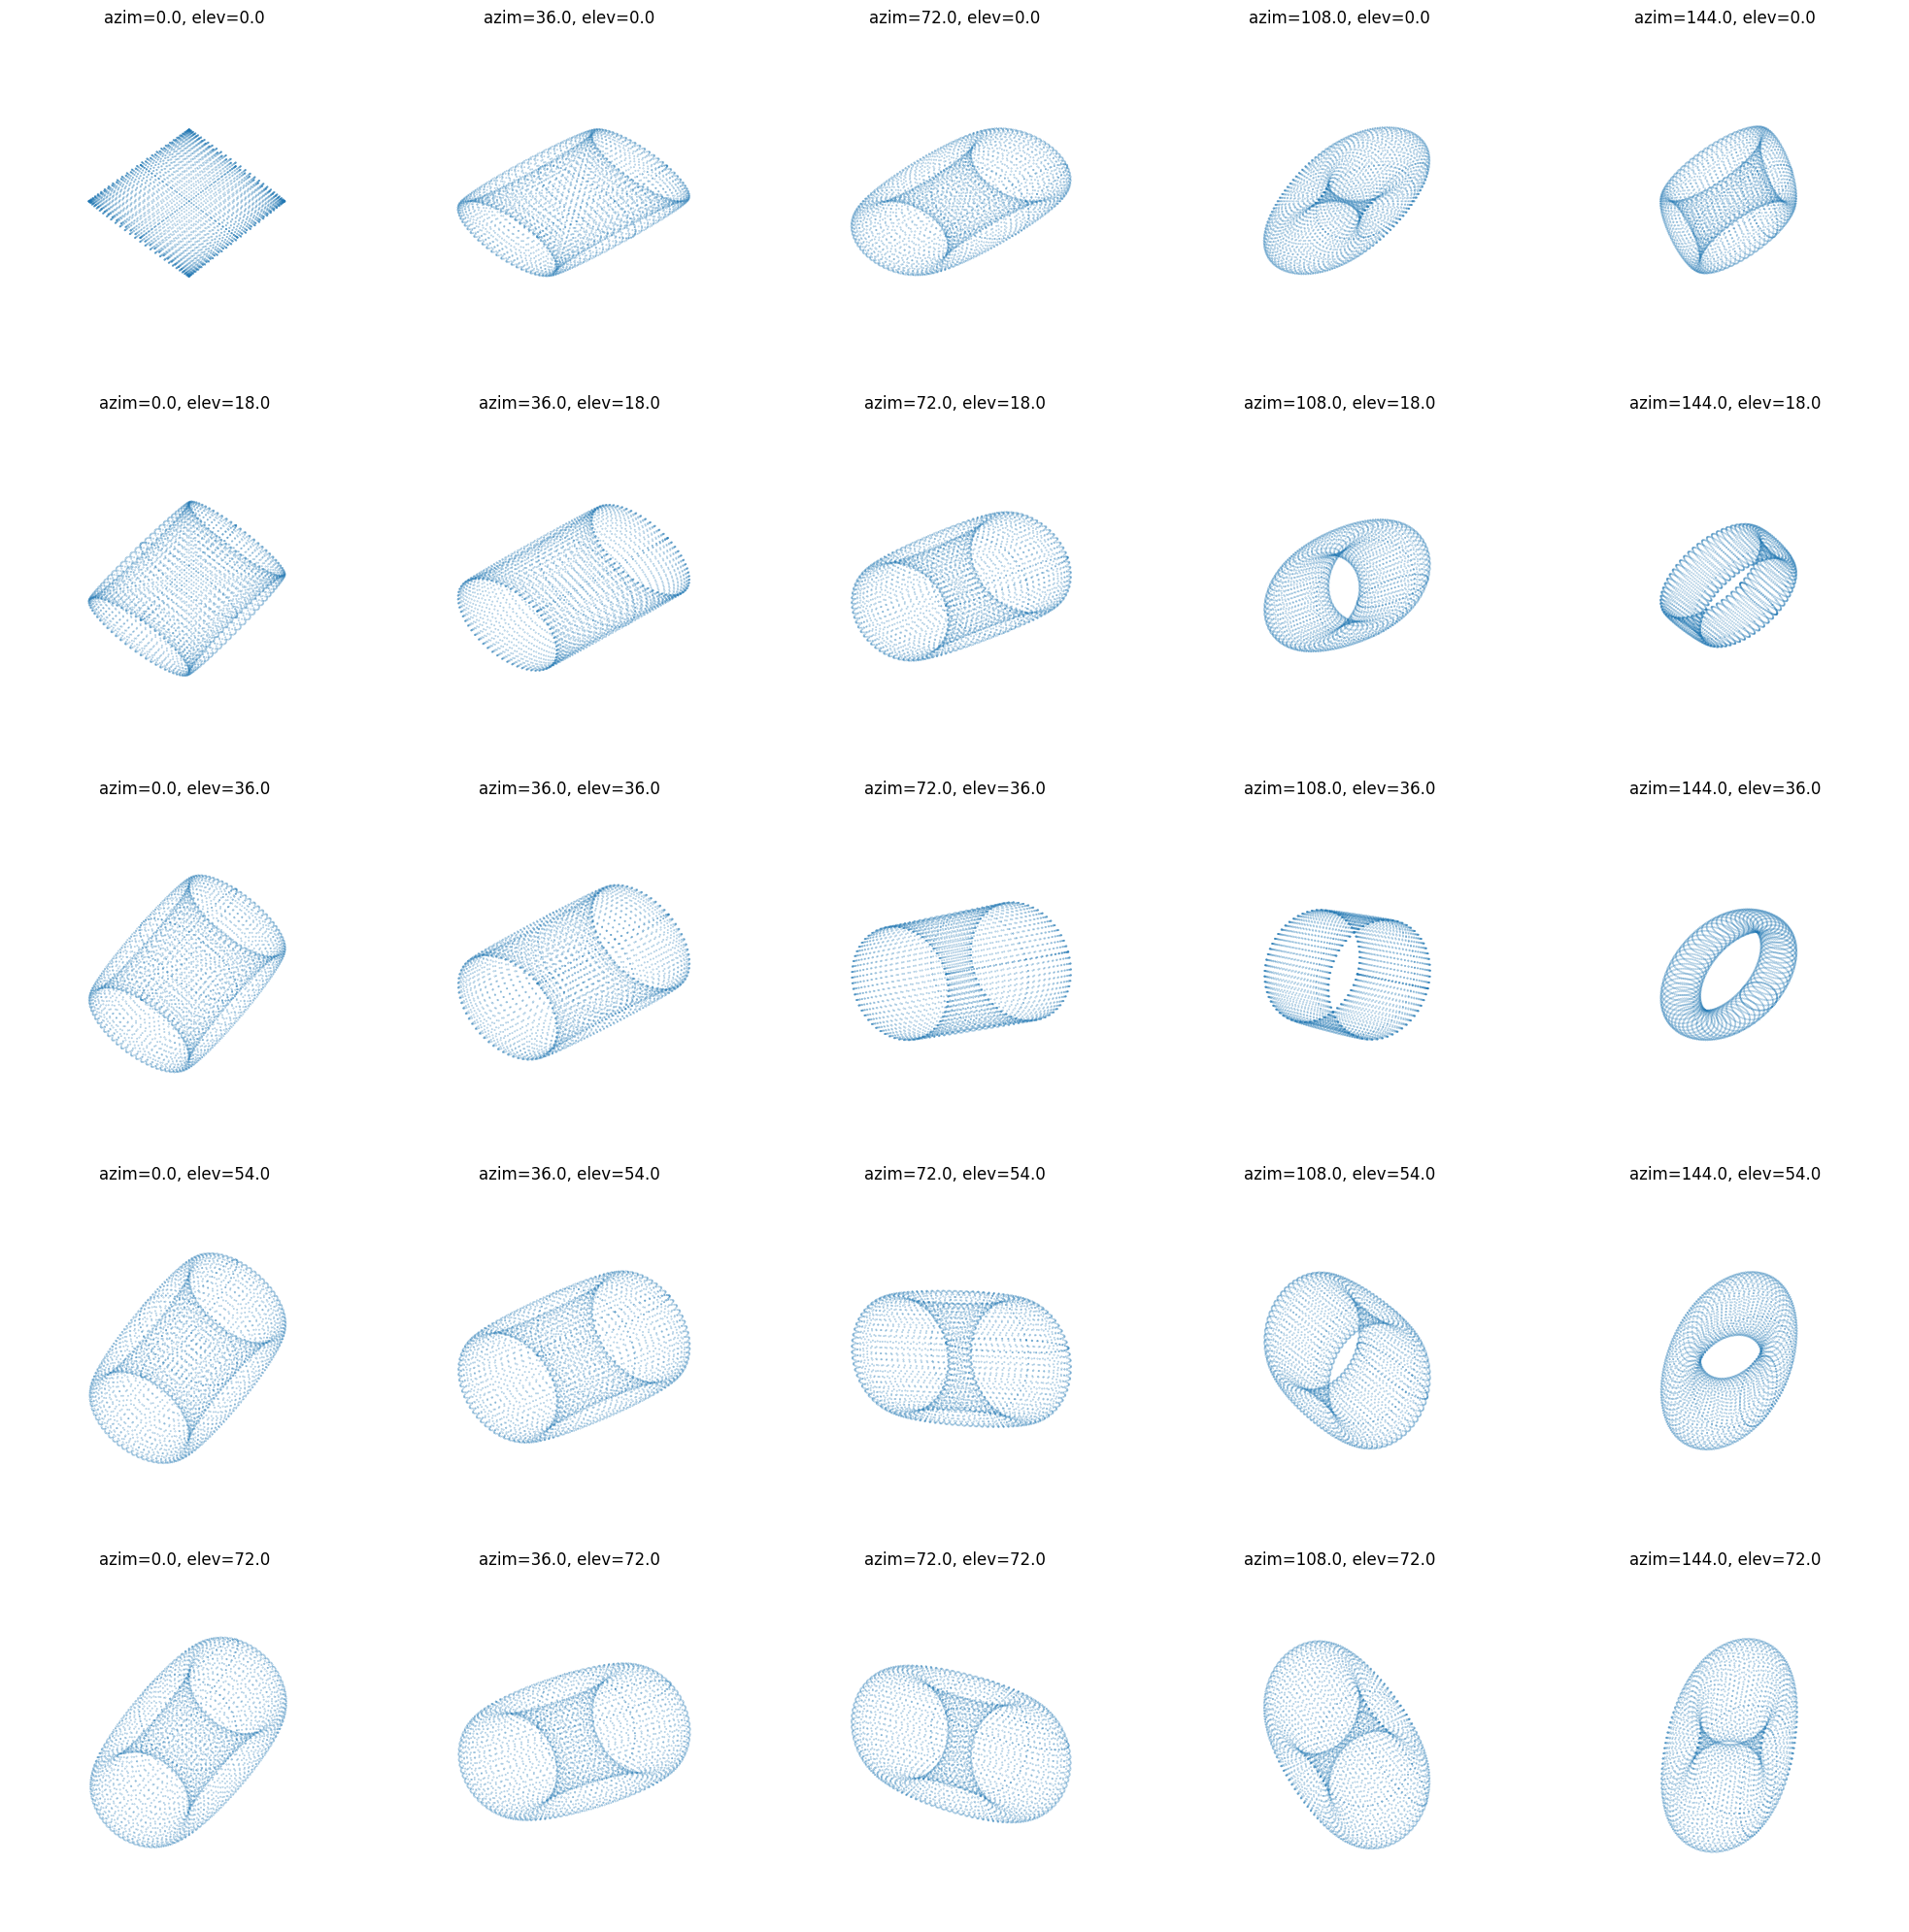

In [6]:
fig, axs = scatter3d(ratemaps.T, nrows=5, ncols=5, s=0.1, alpha=0.5, figsize=(20,20))
#_ = [ax.axis('on') for ax in axs.flat]